In [3]:
#Packages Import
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify as mc
import seaborn as sns
import numpy as np
import researchpy as rp
from scipy import stats
from scipy.stats import shapiro
from pingouin import kruskal
import scikit_posthocs as sp
import pingouin as pg
import statsmodels.stats.multicomp as mc

In [4]:
##data upload for climbing assay
df1 = pd.read_csv('climbing_assay.csv', encoding="latin-1")
df1.head()

,Group,N_bot,N_mid,N_top
0,Group I,0,1,9
1,Group I,0,0,10
2,Group I,0,2,8
3,Group I,0,2,8
4,Group II,0,4,6


In [5]:
## Calculation of Performance indeces
df1['N_tot'] = (df1['N_top']+ df1['N_mid']+ df1['N_bot'])
df1['PI_'] = 0.5 * ((df1['N_tot'] + df1['N_top'] - df1['N_bot'])/(df1['N_tot']))
df1.head()

,Group,N_bot,N_mid,N_top,N_tot,PI_
0,Group I,0,1,9,10,0.95
1,Group I,0,0,10,10,1.00
2,Group I,0,2,8,10,0.90
3,Group I,0,2,8,10,0.90
4,Group II,0,4,6,10,0.80


In [6]:
##Descriptive Statistics for the performance index
rp.summary_cont(df1['PI_'].groupby(df1['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Group I,4,0.9375,0.0479,0.0239,0.8613,1.0137
Group II,5,0.7900,0.0418,0.0187,0.7381,0.8419
Group III,4,0.8625,0.0479,0.0239,0.7863,0.9387
Group IV,4,0.8875,0.0629,0.0315,0.7874,0.9876
Group V,5,0.8700,0.0758,0.0339,0.7758,0.9642


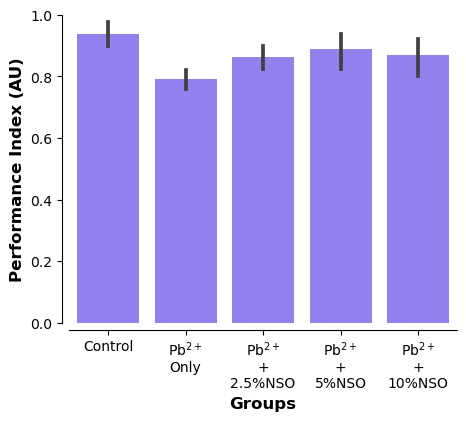

In [8]:
## Bar plot for the Negetive Geotaxis Assay
sns.barplot(data=df1, y='PI_', x='Group',palette=['#8470FF'])
sns.despine(trim=False,offset=5)
plt.title('', weight='bold', fontsize=12)
plt.ylim(0,1)
plt.ylabel('Performance Index (AU)', weight='bold', fontsize=12)
plt.xlabel('Groups', weight='bold', fontsize=12)
plt.gca().set_xticklabels(['Control', 'Pb$^{2+}$\nOnly','Pb$^{2+}$\n+\n2.5%NSO','Pb$^{2+}$\n+\n5%NSO','Pb$^{2+}$\n+\n10%NSO'])
fig = plt.gcf()
fig.set_size_inches(5,4)
plt.savefig("PI_NGTA.PNG", bbox_inches = 'tight', dpi=300)

In [9]:
##Definition of function for shapiro wilk test for normality
def shapiro_by_group(group):
    shapiro_stat, shapiro_p = shapiro(group)
    return shapiro_stat, shapiro_p

In [11]:
## Normality test for the performance index
shapiro_results_NGA = df1.groupby('Group')['PI_'].apply(shapiro_by_group)
shapiro_results_NGA

Group
Group I      (0.8633691072463989, 0.27245327830314636)
Group II      (0.8810376524925232, 0.3140396773815155)
Group III    (0.8633691072463989, 0.27245327830314636)
Group IV      (0.8949451446533203, 0.4063870310783386)
Group V       (0.9140781760215759, 0.4924813508987427)
Name: PI_, dtype: object

In [12]:
## Oneway Anova for the negetive geotaxis Assay
aov = pg.anova(dv='PI_', between='Group', data=df1,
               detailed=True)
aov.round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,Group,0.051,4,0.013,3.92,0.02,0.48
1,Within,0.056,17,0.003,NaN,NaN,NaN


In [14]:
## Turkey test(post hoc) 
comp = mc.MultiComparison(df1['PI_'], df1['Group'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Group I,Group II,-0.1475,0.0099,-0.2642,-0.0308,True
Group I,Group III,-0.075,0.377,-0.1981,0.0481,False
Group I,Group IV,-0.05,0.7313,-0.1731,0.0731,False
Group I,Group V,-0.0675,0.4271,-0.1842,0.0492,False
Group II,Group III,0.0725,0.3594,-0.0442,0.1892,False
Group II,Group IV,0.0975,0.1275,-0.0192,0.2142,False
Group II,Group V,0.08,0.2224,-0.0301,0.1901,False
Group III,Group IV,0.025,0.9702,-0.0981,0.1481,False
Group III,Group V,0.0075,0.9996,-0.1092,0.1242,False
Group IV,Group V,-0.0175,0.9903,-0.1342,0.0992,False
